# The Google Play Android App market

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import plotly.graph_objs as go

# import warnings
# warnings.filterwarnings("ignore")

# Importing data and getting a glimpse at it

In [2]:
apps_with_duplicates = pd.read_csv("apps.csv")

apps = apps_with_duplicates.drop_duplicates()

print(f'Total number of apps in the dataset: {apps.sum()}')

n = 5
apps.sample(n)

Total number of apps in the dataset: Unnamed: 0                                                 54729564
App               Photo Editor & Candy Camera & Grid & ScrapBook...
Category          ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_...
Rating                                                      34203.9
Reviews                                                  2092067574
Installs          10,000+500,000+5,000,000+50,000,000+100,000+50...
Price             0000000000000000000000000000000000000000000000...
Content Rating    EveryoneEveryoneEveryoneTeenEveryoneEveryoneEv...
Genres            Art & DesignArt & Design;Pretend PlayArt & Des...
Last Updated      January 7, 2018January 15, 2018August 1, 2018J...
dtype: object


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7000,8065,CX-42,FAMILY,NaN,0,32M,10+,Free,0,Everyone,Casual,"January 2, 2018",1.2_3,4.2 and up
7150,8224,DB TOS - Pocket Helper,TOOLS,4.2,265,NaN,"10,000+",Free,0,Everyone,Tools,"May 22, 2016",1.7,4.0 and up
588,715,Dinosaurs Coloring Pages,EDUCATION,4.4,390,41M,"500,000+",Free,0,Everyone,Education;Education,"February 3, 2018",1.1.6,4.0 and up
867,1078,Zenith Bank Mobile App,FINANCE,4.3,7215,18M,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.7.4,4.0 and up
6602,7661,Grenada Co-operative Bank,FINANCE,4.4,137,0.4,"10,000+",Free,0,Everyone,Finance,"June 26, 2013",2.4.3,1.6 and up


# Cleaning the data

In [3]:
chars_to_remove = ["+",",","M","$"]
cols_to_clean = ["Installs","Size","Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col])

# Data visualization

In [4]:
plotly.offline.init_notebook_mode(connected=True)

num_categories = len(apps['Category'].unique())
print(f'Number of categories: {num_categories}')

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories: 33


In [5]:
avg_app_rating = apps["Rating"].mean()
print(f'Average app rating: {avg_app_rating}')

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating: 4.173243045387998


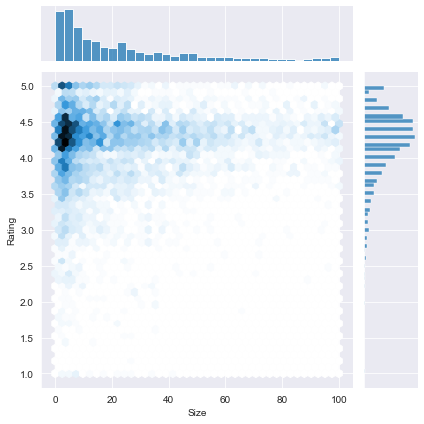

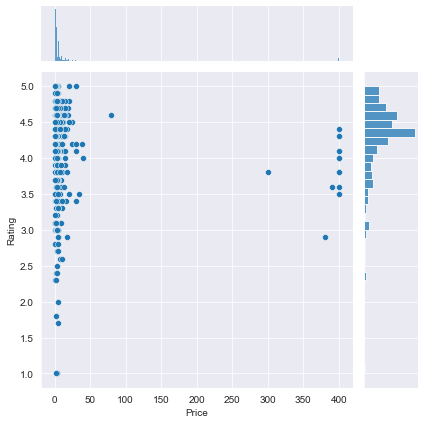

In [6]:
sns.set_style("darkgrid")

large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

paid_apps = apps[apps['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


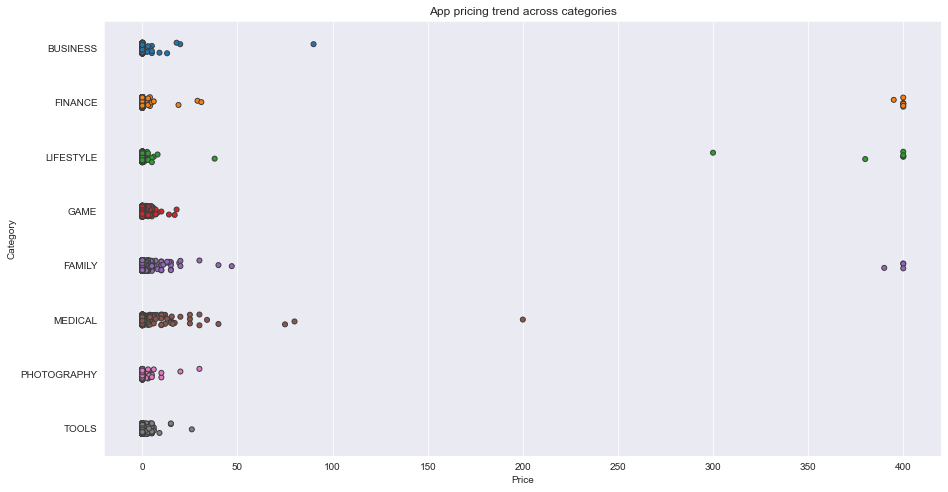

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

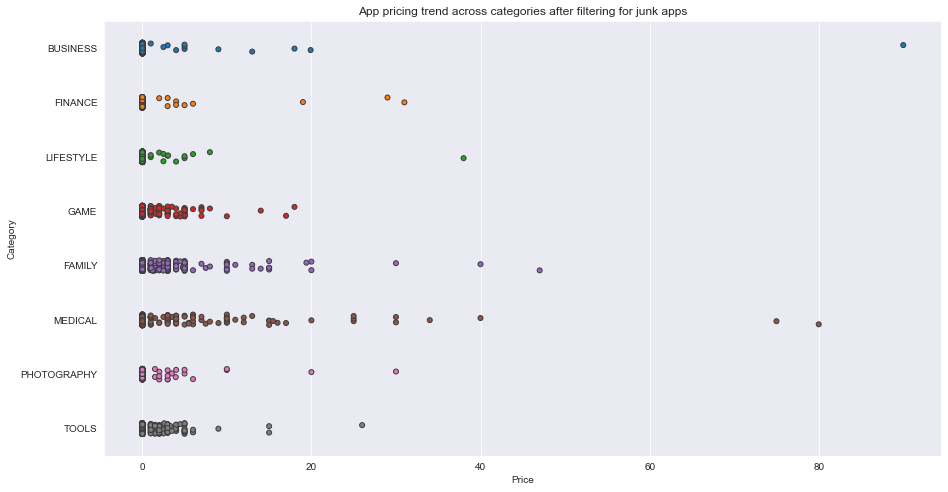

In [8]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps');

In [9]:
trace0 = go.Box(
    y=apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y=apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# Comparison with user review data

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

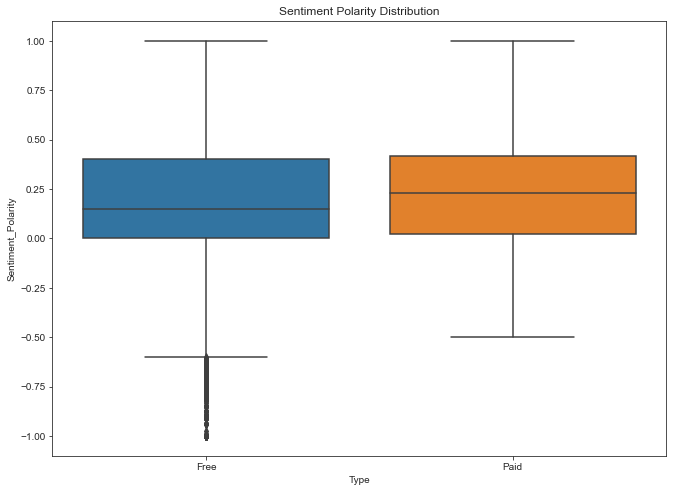

In [10]:
reviews_df = pd.read_csv("user_reviews.csv")

merged_df = pd.merge(apps, reviews_df, on="App", how="inner")

merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x="Type", y="Sentiment_Polarity", data=merged_df)
ax.set_title('Sentiment Polarity Distribution')